# WIP So what's with __Goblins__ and how do they fight?

Here I delve into the numbers that describe an instance of a Goblin, what a population of Goblins within a tournament might look like and perhaps most importantly, the exact probabilistic functions that goblin populations are sampled from.

What makes this data unique is that unlike most 'real' datasets, the functions that describe goblins were defined manually and so are known. 

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px
import pandas as pd
import random

# local imports
from goblins import Fighter
from combat import Tournament

# nb configs
pd.set_option("display.max_columns", 500)
colour_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.style.use("fivethirtyeight")
font = {'family': 'serif', 'size': 12}
plt.rc('font', **font)

np.random.seed(42)
random.seed(42)

A Goblin's defining parameters can be categorised as follows:

----
1. __Base Stats__

    `max_hp, strength, cooldown, eagerness, lr`

    Goblin's engage in simulated battles within Tournaments. Battles are RPG/JRPG/Pokemon inspired, although rather than being turn-based, time runs linearly.
    
    Their objective is to defeat an opponent in a 1v1 by reducing their `max_hp` or Hit Points to 0. Their base stats determine some fundamental things about their performance within this framework. All base stats are integers, except lr or _learning rate_ which is a decimal value.

    Summaries:

    - __max_hp__: How much damage the Goblin can take from an opponent before losing the combat. Refreshed between combats.
    - __strength__: A factor in determining damage dealt per succseful swing.
    - __cooldown__: The delay between swings. Time in tournaments moves in seconds (realised as loop iterations). A cooldown of 7 means that a goblin will take a swing every 7 seconds. 
    - __eagerness__: Per tournament day, Goblins that are more _eager_ will likely compete in more combats.
    - __lr__: Learning rate contributes to how much a Goblin learns from a given combat, increasing its strength from one fight to the next. Some goblins are capable of learning much more from each combat than others.

----

2. __Base Probabilities__

    `guard_prob, guardbreak_prob, parry_prob, crit_prob, dodge_prob`

    When one Goblin swings at another, each has probabilities associated with the occurence of particular events. These determine which multipliers are applied during damage calculation and, in the case of `parry_prob`, who is going to sustain damage. I term these probabilities _specialisms_ below.

    Summaries:

    - __guard_prob__: The chance for the defending goblin to reduce the damage of an attack. Imagine a shield being raised or other deflection.
    - __guardbreak_prob__: Given that an opponent has guarded, the chance for the attacking Goblin to break through the guard and deal increased damage.
    - __parry_prob__: When an attacking Goblin swings, there is a chance that the defending Goblin counters; this represents that chance. A successful counter prevents the defending Golbin from taking damage and causes the attacking Goblin to take damage instead.
    - __crit_prob__: Prior to any of the above, each Goblin has the potential to supercharge a swing with a 'lucky strike'. Maybe their opponent slipped or the sun was in their eyes, or perhaps they just put a little extra force into a particular swing.
    - __dodge_prob__: Nimble goblins have a chance to completely avoid damage from a swing by dodging being struck altogether.

----

3. __Direct Multipliers__
    
    `guts, avarice`
    Multipliers interact directly with the damage dealt during a swing, acting as a scaling factor.
    - __guts__: todo
    - __avarice__: How much a goblin is willing to exert itself can be driven by money. Some goblins are more motitvated by pennies than others. Some get cocky knowing they are a high paid fighter. 


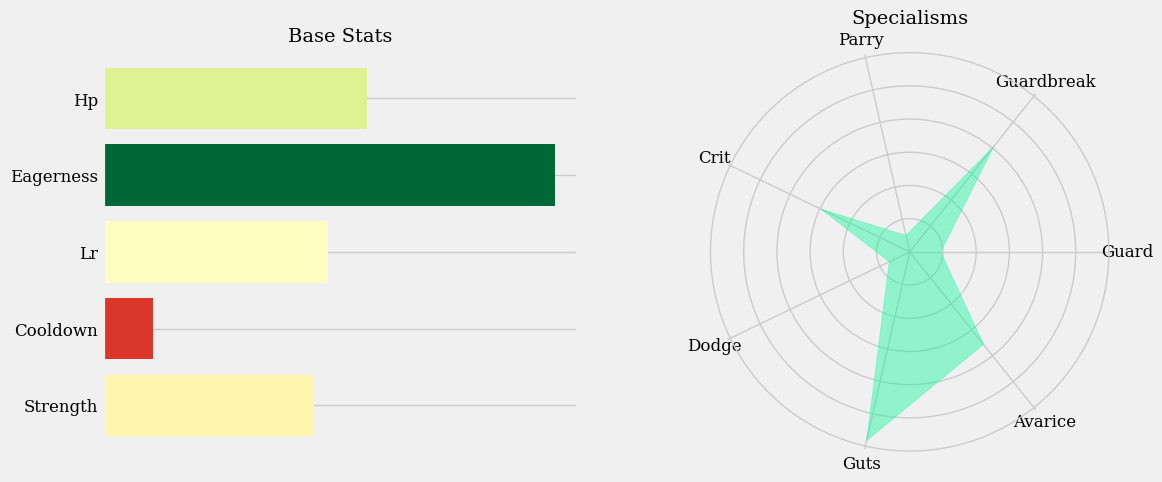

In [34]:
# initialise a random goblin
goblin = Fighter(name="Greenjohn Exampleface")
goblin.rating_deviation=350

# visualise stats
fig = goblin.plot_base_stats()

The above bar chart normalizes stats so that 'how good' they are can be actively compared. That being said, the relationships between these stats and success is not simple, so an impressive Base Stat plot alone does not imply the Goblin is strong.

The true stat values for this goblin are seen here:

In [3]:
# look at stats
all_stats = goblin.base_stats("bs")
all_stats.update(goblin.base_stats("bp"))
fnc = goblin._floors_and_ceilings()
floors, ceilings = fnc["floors"], fnc["ceilings"]

print("Possible range in brackets:")
for k in all_stats.keys():
    print(f"{k.upper()}\n{all_stats[k]:.2f} ({floors[k]}, {ceilings[k]})\n")

Possible range in brackets:
MAX_HP
36.00 (20, 60)

STRENGTH
27.00 (10, 30)

COOLDOWN
6.00 (1, 9)

LR
0.01 (0.001, 0.03)

EAGERNESS
2.00 (1, 5)

GUARD_PROB
0.14 (0, 0.9)

GUARDBREAK_PROB
0.76 (0.0, 0.9)

PARRY_PROB
0.28 (0.0, 0.9)

CRIT_PROB
0.00 (0.0001, 0.45)

DODGE_PROB
0.03 (0, 0.04)

GUTS
0.70 (0.14285714285714285, 1.0)

AVARICE
0.24 (0, 1)




3. __Tournament Results & Metrics__

    Results: `rating, rating deviation, wins, total_games, winrate`

    Metrics: `guards_broken, successful_guards, failed_guards, attacks_parried`


In [4]:
pre_tourn = Tournament(
    participants = 100,
    n_days = 1,
    daily_combats = 50,
    daily_mortalities=0
)
pre_tourn.run()
pre_fighters = pd.DataFrame(pre_tourn.fighter_info())
pre_tourn.reset_ladder()


100%|██████████| 1/1 [00:00<00:00,  7.63it/s]


In [5]:
tourn = Tournament(fighters=pre_tourn.fighters.copy(), 
                    n_days=365, # ~1 day = 1month
                    daily_combats=300,
                    daily_mortalities=0)
tourn.run()

100%|██████████| 365/365 [00:33<00:00, 10.87it/s]


In [6]:
pre_fighters.sort_values("mean_outcome",ascending=False)

,name,rating,rating_deviation,mean_outcome,rating_interval,alive,team,manager,max_hp,current_hp,strength,cooldown,lr,eagerness,funding,guard_prob,guardbreak_prob,parry_prob,crit_prob,dodge_prob,guts,avarice,skill,archived_games,games,wins,total_games,entry_day,time_since_last_combat,swings,guards_broken,successful_guards,failed_guards,attacks_parried,times_parried_by_opponent,critical_hits,attacks_dodged,damage_instances
71,Wartbucket Gobsmack X,1799.513441,227.692695,0.741579,None,True,None,None,53,53,12,3,0.018331,4,181,0.391662,0.508338,0.381253,0.000100,0.039189,0.725275,0.994443,1.0,"[{'win': True, 'time': 10, 'current_n_games': ...","[{'win': False, 'time': 7, 'current_n_games': ...",3,3,0,0,13,3,1,1,7,4,3,0,"[29, 7, 7, 7, 8, 7, 12, 7, 7, 28, 10, 10, 7, 1..."
1,Sneezewort Bogsnuggle IV,1747.203252,253.345770,0.700361,None,True,None,None,20,20,29,5,0.011601,5,453,0.362671,0.537329,0.268664,0.000100,0.039551,0.861923,0.645518,1.0,"[{'win': True, 'time': 5, 'current_n_games': 0...","[{'win': False, 'time': 3, 'current_n_games': ...",2,2,0,0,3,2,1,0,1,0,0,0,"[15, 18, 18, 14, 18, 13, 13, 15, 52, 14, 13, 1..."
4,Moldysnot Jellybelch III,1747.203252,253.345770,0.700361,None,True,None,None,49,49,17,2,0.012558,4,199,0.487164,0.412836,0.361231,0.000100,0.039968,0.761923,0.999985,1.0,"[{'win': True, 'time': 8, 'current_n_games': 0...","[{'win': False, 'time': 10, 'current_n_games':...",2,2,0,0,8,1,0,1,1,1,2,0,"[4, 4, 14, 48, 4, 9, 9, 9, 9, 9, 13, 4, 4, 9, ..."
62,Snaggletooth Gigglefizz IV,1747.203252,253.345770,0.700361,None,True,None,None,59,59,12,6,0.010783,3,193,0.245830,0.654170,0.245314,0.000100,0.036725,0.661923,0.950159,1.0,"[{'win': True, 'time': 18, 'current_n_games': ...","[{'win': False, 'time': 24, 'current_n_games':...",2,2,0,0,7,3,2,0,0,0,2,0,"[9, 4, 45, 8, 12, 11, 32, 9, 7, 11, 7, 8, 7, 9..."
61,Jellybelly Squeakernose VI,1747.203252,253.345770,0.700361,None,True,None,None,44,44,23,6,0.014157,5,867,0.853716,0.046284,0.017356,0.415287,0.036793,0.861923,0.129129,1.0,"[{'win': True, 'time': 6, 'current_n_games': 0...","[{'win': True, 'time': 12, 'current_n_games': ...",2,2,0,0,5,0,1,1,0,0,4,0,"[33, 13, 8, 13, 31, 30, 13, 31, 4, 31, 13, 12,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Chucklebump Squidney IV,1252.796748,253.345770,0.299986,None,True,None,None,35,35,11,5,0.010643,4,282,0.409564,0.490436,0.245218,0.000100,0.000441,0.761923,0.899842,1.0,"[{'win': False, 'time': 6, 'current_n_games': ...","[{'win': False, 'time': 6, 'current_n_games': ...",0,2,0,0,4,0,1,1,0,0,1,0,"[8, 0, 7, 31, 6, 3, 8, 8, 6, 8, 39, 29, 6, 6, ..."
74,Gigglesnort Picklegrin V,1252.796748,253.345770,0.299986,None,True,None,None,28,28,13,7,0.009215,5,578,0.442186,0.457814,0.114453,0.221093,0.000785,0.861923,0.264648,1.0,"[{'win': False, 'time': 2, 'current_n_games': ...","[{'win': False, 'time': 20, 'current_n_games':...",0,2,0,0,1,0,0,1,0,0,1,0,"[10, 10, 24, 7, 8, 0, 7, 26, 10, 7, 7, 7, 26, ..."
27,Mudfizzle Wobblewrench III,1252.796748,253.345770,0.299986,None,True,None,None,40,40,16,8,0.019167,5,827,0.567718,0.332282,0.041535,0.366929,0.023825,0.861923,0.057384,1.0,"[{'win': False, 'time': 10, 'current_n_games':...","[{'win': False, 'time': 6, 'current_n_games': ...",0,2,0,0,3,0,4,0,0,0,3,0,"[26, 10, 26, 9, 9, 10, 25, 3, 7, 8, 8, 7, 3, 3..."
96,Toadstool Jellybelch X,1200.486559,227.692695,0.258775,None,True,None,None,35,35,25,5,0.006959,3,966,0.551463,0.348537,0.174268,0.101463,0.039737,0.625275,0.181288,1.0,"[{'win': False, 'time': 16, 'current_n_games':...","[{'win': False, 'time': 15, 'current_n_games':...",0,3,0,0,8,1,2,2,2,2,0,1,"[9, 11, 9, 13, 9, 4, 13, 9, 13, 13, 4, 14, 9, ..."


In [7]:
fighters = tourn.fighter_info()
df = pd.DataFrame(fighters)
df["wr"] = df["wins"]/df["total_games"]
leaderboard = df.sort_values("rating", ascending=False).drop(["alive", "rating_interval", "current_hp", "time_since_last_combat"], axis=1)
leaderboard

,name,rating,rating_deviation,mean_outcome,team,manager,max_hp,strength,cooldown,lr,eagerness,funding,guard_prob,guardbreak_prob,parry_prob,crit_prob,dodge_prob,guts,avarice,skill,archived_games,games,wins,total_games,entry_day,swings,guards_broken,successful_guards,failed_guards,attacks_parried,times_parried_by_opponent,critical_hits,attacks_dodged,damage_instances,wr
59,Wobblechomp Chucklebump V,2110.230413,113.053328,0.931769,None,None,52,18,1,0.016666,4,399,0.828166,0.071834,0.071834,0.306331,0.037457,0.561505,0.503927,10.000000,"[{'win': True, 'time': 3, 'current_n_games': 0...",[],1370,1448,0,2919,86,93,77,20,611,822,11,"[12, 29, 7, 7, 7, 7, 7, 7, 7, 28, 3, 7, 29, 7,...",0.946133
89,Sneezewort Gigglewobble I,2090.431368,145.698717,0.921809,None,None,40,22,1,0.014327,1,631,0.496696,0.403304,0.403304,0.000100,0.039929,0.308141,0.913540,4.022830,"[{'win': True, 'time': 4, 'current_n_games': 0...",[],318,366,0,1105,190,19,19,55,237,22,4,"[11, 14, 10, 11, 4, 14, 5, 5, 14, 15, 11, 11, ...",0.868852
53,Chucklebump Mudwobble VI,2064.179412,113.448078,0.917097,None,None,49,21,3,0.007379,4,174,0.061043,0.838957,0.629218,0.000100,0.035133,0.562069,0.989611,7.895973,"[{'win': True, 'time': 9, 'current_n_games': 0...",[],1286,1446,0,2194,747,17,17,806,503,83,18,"[16, 62, 12, 11, 44, 11, 11, 11, 11, 11, 11, 1...",0.889350
38,Moldysnot Fuzzywump VIII,2037.008936,90.518085,0.909819,None,None,35,24,2,0.012905,5,356,0.443099,0.456901,0.399788,0.000100,0.039913,0.629312,0.893144,10.000000,"[{'win': False, 'time': 5, 'current_n_games': ...",[],1608,1808,0,2826,556,141,89,316,581,145,12,"[16, 5, 13, 12, 12, 15, 13, 16, 5, 5, 13, 12, ...",0.889381
66,Toadstool Wobblechomp VIII,2035.859240,94.388808,0.909028,None,None,37,26,2,0.010136,5,435,0.531356,0.368644,0.322564,0.000100,0.036506,0.634841,0.698574,10.000000,"[{'win': True, 'time': 14, 'current_n_games': ...",[],1531,1801,0,3104,501,186,156,323,642,161,28,"[5, 11, 5, 15, 0, 12, 11, 5, 12, 5, 12, 16, 5,...",0.850083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Toadstool Gobblenibble,1136.739347,102.604944,0.177352,None,None,44,15,5,0.008846,2,758,0.593663,0.306337,0.153168,0.143663,0.029784,0.346578,0.193546,3.150164,"[{'win': False, 'time': 14, 'current_n_games':...",[],181,728,0,1299,161,544,317,276,267,262,55,"[3, 24, 8, 9, 30, 8, 0, 6, 3, 3, 8, 9, 8, 8, 8...",0.248626
95,Bumblewhisk Wobblechomp I,1130.551141,124.727384,0.176549,None,None,39,13,5,0.011288,1,543,0.418458,0.481542,0.240771,0.000100,0.010564,0.278182,0.012042,2.942826,"[{'win': False, 'time': 12, 'current_n_games':...",[],60,365,0,628,132,175,123,213,120,47,4,"[5, 5, 18, 7, 18, 2, 2, 5, 7, 5, 5, 7, 5, 5, 5...",0.164384
0,Bumblegut Bogsnuggle III,1119.315585,107.696975,0.166307,None,None,51,21,6,0.002044,2,657,0.804672,0.095328,0.035748,0.378504,0.031582,0.353853,0.109785,1.585803,"[{'win': False, 'time': 15, 'current_n_games':...",[],154,726,0,1127,53,929,527,62,237,443,55,"[7, 11, 7, 7, 26, 11, 3, 12, 11, 28, 12, 29, 1...",0.212121
94,Crankyboots Snotwhistle V,1078.326073,124.398443,0.143437,None,None,26,20,3,0.008295,1,625,0.669191,0.230809,0.173107,0.103786,0.012952,0.277712,0.853553,1.760904,"[{'win': False, 'time': 3, 'current_n_games': ...",[],117,365,0,710,73,173,108,93,155,93,8,"[11, 10, 11, 39, 10, 14, 10, 5, 15, 16, 39, 4,...",0.320548


In [12]:
leaderboard.iloc[0]["archived_games"]

[{'win': True,
  'time': 3,
  'current_n_games': 0,
  'opponent_rating': 1500.0,
  'opponent_rd': 350.0,
  'opponent_n_games': 1,
  'opponent_name': 'Crankyboots Snotwhistle V',
  'own_rating': 1500.0,
  'own_rd': 350.0},
 {'win': True,
  'time': 6,
  'current_n_games': 0,
  'opponent_rating': 1500,
  'opponent_rd': 350,
  'opponent_n_games': 2,
  'opponent_name': 'Squeakernose Toadfluff X',
  'own_rating': 1500,
  'own_rd': 350},
 {'win': True,
  'time': 3,
  'current_n_games': 1,
  'opponent_rating': 1500,
  'opponent_rd': 350,
  'opponent_n_games': 0,
  'opponent_name': 'Sneezewort Bogsnuggle IV',
  'own_rating': 1500,
  'own_rd': 350},
 {'win': True,
  'time': 5,
  'current_n_games': 2,
  'opponent_rating': 1500,
  'opponent_rd': 350,
  'opponent_n_games': 1,
  'opponent_name': 'Toadstool Gobblenibble ',
  'own_rating': 1500,
  'own_rd': 350},
 {'win': True,
  'time': 4,
  'current_n_games': 3,
  'opponent_rating': 1500,
  'opponent_rd': 350,
  'opponent_n_games': 4,
  'opponent_na

In [9]:
df.describe()

,rating,rating_deviation,mean_outcome,max_hp,current_hp,strength,cooldown,lr,eagerness,funding,guard_prob,guardbreak_prob,parry_prob,crit_prob,dodge_prob,guts,avarice,skill,wins,total_games,entry_day,time_since_last_combat,swings,guards_broken,successful_guards,failed_guards,attacks_parried,times_parried_by_opponent,critical_hits,attacks_dodged,wr
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000
mean,1495.377190,92.565357,0.500000,39.620000,39.620000,19.35000,4.28000,0.010059,3.14000,505.710000,0.513010,0.386990,0.232584,0.125252,0.025033,0.446236,0.556839,4.090537,567.510000,1135.02000,0.0,0.0,1892.690000,311.890000,508.010000,311.890000,385.850000,385.85000,347.96000,39.820000,0.481018
std,232.030706,16.521497,0.201281,10.247227,10.247227,4.33071,1.71199,0.004644,1.42148,211.260732,0.216892,0.216892,0.160154,0.155046,0.013926,0.123105,0.355095,2.347135,364.131054,510.17644,0.0,0.0,978.199043,256.142712,439.009411,262.874779,324.229043,205.03862,320.27059,38.424366,0.187180
min,1059.661722,71.123811,0.132166,20.000000,20.000000,11.00000,1.00000,0.001300,1.00000,30.000000,0.019961,0.000586,0.000439,0.000100,0.000028,0.261238,0.001754,1.128136,60.000000,363.00000,0.0,0.0,323.000000,1.000000,5.000000,2.000000,0.000000,68.00000,15.00000,0.000000,0.164384
25%,1329.167603,79.676153,0.340655,32.000000,32.000000,16.00000,3.00000,0.006957,2.00000,335.750000,0.360693,0.240564,0.104611,0.000100,0.015240,0.338200,0.241526,2.511017,309.250000,727.00000,0.0,0.0,1286.750000,134.250000,174.500000,101.000000,163.750000,247.50000,107.50000,10.250000,0.354215
50%,1446.267279,86.995226,0.462964,39.500000,39.500000,20.00000,4.00000,0.009233,3.00000,524.000000,0.517199,0.382801,0.223115,0.010375,0.028660,0.424927,0.578063,3.275978,527.000000,1088.00000,0.0,0.0,1639.500000,228.500000,449.000000,268.500000,319.000000,340.00000,242.00000,27.500000,0.430592
75%,1618.630289,102.950401,0.639256,46.250000,46.250000,22.00000,5.00000,0.012719,4.00000,637.500000,0.659436,0.539307,0.348502,0.240778,0.037457,0.548500,0.919970,4.897151,766.500000,1448.50000,0.0,0.0,2495.750000,476.750000,632.000000,404.000000,542.250000,513.00000,498.50000,58.750000,0.592604
max,2110.230413,145.698717,0.931769,59.000000,59.000000,29.00000,8.00000,0.024233,5.00000,975.000000,0.899414,0.880039,0.736619,0.449121,0.040000,0.634841,1.000000,10.000000,1608.000000,1808.00000,0.0,0.0,5295.000000,1251.000000,2111.000000,1264.000000,1573.000000,1106.00000,1489.00000,148.000000,0.946133


c:\Users\User\portfolio_work\glicko_goblins\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


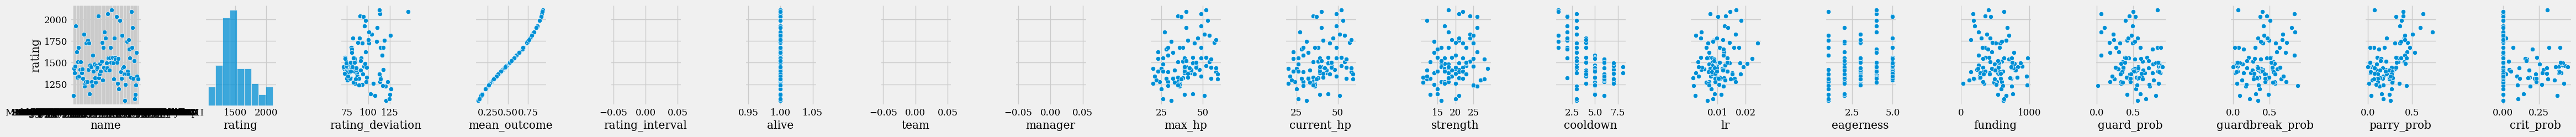

In [10]:
sns.pairplot(df, y_vars=["rating"], x_vars=df.columns[:len(df.columns)//2])

c:\Users\User\portfolio_work\glicko_goblins\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


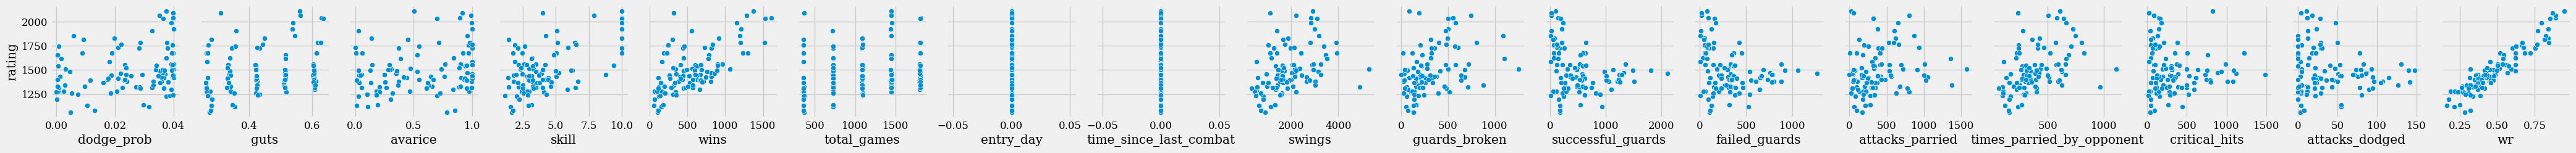

In [11]:
xv = list(df.columns[len(df.columns)//2:])
xv.remove("games")
xv.remove("archived_games")
xv.remove("damage_instances")
sns.pairplot(df, y_vars=["rating"], x_vars=xv)